In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta, date, datetime
import plotly.express as px
from fredapi import Fred
import os
import shutil
from fpdf import FPDF
from matplotlib import pyplot as plt 
from matplotlib import style

# from datetime import datetime, timedelta, date

#Config is a user file stored in the parent directory
import sys
sys.path.insert(1, '../')
import config

# User will need a FRED API key, can sign up for one here https://fred.stlouisfed.org/docs/api/api_key.html
# replace with your own API key: fred = Fred(api_key='YOUR KEY HERE')
fred = Fred(api_key=config.api_key)

start_d ='1990-01-01'
end_d= '2023-02-03'
fq = "m" 
# FRED_list = ['T10Y2Y','MORTGAGE30US','FEDFUNDS','CPIAUCSL','SP500','UNRATE']
FRED_list = ['T10Y2Y','MORTGAGE30US']

Name_remap = {'T10Y2Y': '10-Year Minus 2-Year Treasury', 'CPIAUCSL': 'Headline CPI'}

# df,dfinfo = fredget(FRED_list, start_d, end_d, freq = fq, plots=True, name_map = Name_remap)

T10Y2Y
MORTGAGE30US
            T10Y2Y  MORTGAGE30US
1980-01-01     NaN           NaN
1980-01-02   -0.89           NaN
1980-01-03   -0.85           NaN
1980-01-04   -0.81         12.85
1980-01-07   -0.72           NaN


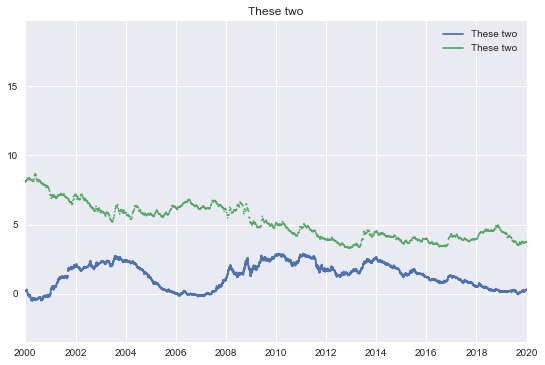

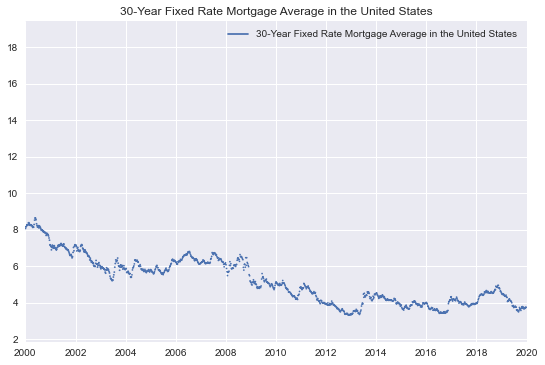

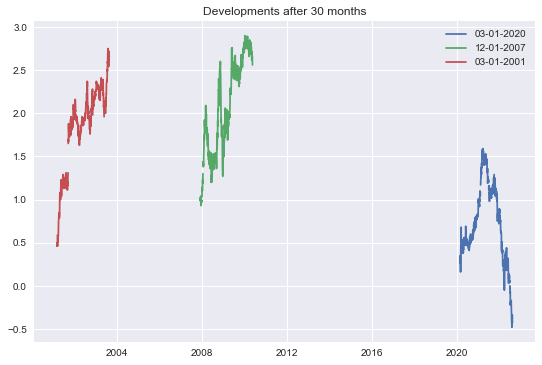

In [20]:
import matplotlib.pyplot as plt
from fredapi import Fred


"""
methods that the class should have:

#SETTINGS METHODS 
Set plot style & size 
Output settings 


#PLOTTING METHODS:
standard plot method
Event driven plot method
Overlay delay 

MISC METHODS
#Info on whats collected 
Recession bands  

#overlay financials plot method 
https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

"""


class fredget:
    def __init__(self, api_key):
        self.fred = Fred(api_key=api_key)
        self.plotstyle = 'seaborn'
        
    today = date.today()
    start_default = date(1980, 1, 1) 
    ##################################################################################
    def get(self,varlist, start_date=start_default, end_date=today,plots=True,freq="",name_map = dict()):
        df_collect = pd.DataFrame()

        for var in varlist:
            df_add = fred.get_series(var, observation_start = start_date, observation_end=end_date, frequency =freq).to_frame(name = var)
            info_add = fred.get_series_info(var).to_frame(name = var)
            print(var)
            #If user changes the 
            if freq != "":
                info_add.loc['cur_freq', var] = freq
                
            if var in name_map:
                info_add.loc['user_title', var] = name_map[var]
            else:
                info_add.loc['user_title', var] = info_add.loc['title', var]
                        
            if plots == True:
                df_add.plot(y=var, use_index=True, kind='line', title = info_add.loc['user_title', var], ylabel = info_add.loc['units', var] )
                
            if df_collect.empty == True:
                df_collect = df_add
                info_store = info_add
            else:
                df_collect = pd.merge(df_collect, df_add, left_index=True, right_index=True, how='outer')
                info_store = pd.merge(info_store, info_add, left_index=True, right_index=True, how='left')
                
        df_collect.sort_index()
        
        self.data = df_collect
        self.metadata = info_store
        self.vars = varlist
        
    def peekdf(self):
        return print(self.data.head())
    def getdf(self):
        return self.data
    
    
    #Method for plotting a single series, will automatically use metadata
    
    def plot(self,var, date_start, date_end, save = True, units = "" ):  
        plt.figure()
        startd = datetime.strptime(date_start,'%m-%d-%Y')
        endd = datetime.strptime(date_end,'%m-%d-%Y')
        
        plt.style.use(self.plotstyle)
        title = self.metadata.loc['title', var]
        title = self.metadata.loc['title', var]
        plt.plot(self.data.index,self.data[var],label = title, drawstyle='steps-post')
        plt.legend()
        plt.ylabel(units)
        plt.xlim([startd, endd])
        plt.title(title)
        # plt.update_traces(connectgaps=True)
       
    #method for plotting more than one series     
    def plot_m(self,varlist, date_start, date_end, title ="",save = True, units = "" ):  
        plt.figure()
        
        startd = datetime.strptime(date_start,'%m-%d-%Y')
        endd = datetime.strptime(date_end,'%m-%d-%Y')
        
        plt.style.use(self.plotstyle)
        
        for plotvar in varlist:
            plt.plot(self.data.index,self.data[plotvar],label = title, drawstyle='steps-post')
            plt.legend()
            plt.ylabel(units)
            plt.xlim([startd, endd])
            plt.title(title)
            # plt.update_traces(connectgaps=True)

    def plot_periods(self,var,dates,months_after,title=""):
        plt.figure()
        plot_ind = np.linspace(0,months_after,months_after)
        #plt.style.use('seaborn-bright')
        for datestart in date_set:
            dateind = datetime.strptime(datestart,'%m-%d-%Y')
            end_date_plot = dateind + timedelta(days = (30*months_after))
            df_plot = self.data.loc[dateind:end_date_plot]

            plt.plot(df_plot[var],label = datestart)
            plt.legend()
            plt.title(f"Developments after {months_after} months")
 
###############   
fredobj = fredget(api_key=config.api_key)
fredobj.get(FRED_list,plots=False)
fredobj.peekdf()
fredobj.plot_m(['T10Y2Y','MORTGAGE30US'],"01-01-2000","01-01-2020",title = "These two")
fredobj.plot('MORTGAGE30US',"01-01-2000","01-01-2020")
test_df = fredobj.getdf()

date_set = ['03-01-2020','12-01-2007','03-01-2001']
fredobj.plot_periods('T10Y2Y',date_set,30)



In [3]:
#for now consider this code to be saved for reference 




In [4]:
# #Basic structure of the class

# class FredData:
#     def __init__(self, api_key):
#         self.fred = Fred(api_key=api_key)

#     def get_data(self, series_id, start_date=None, end_date=None):
#         """
#         Retrieve data for a specified FRED series.
        
#         Args:
#             series_id (str): The FRED series ID to retrieve.
#             start_date (str, optional): The start date for the data. Defaults to None.
#             end_date (str, optional): The end date for the data. Defaults to None.
        
#         Returns:
#             pandas.DataFrame: The data for the specified series.
#         """
#         return self.fred.get_series(series_id, start_date=start_date, end_date=end_date)
        
#     def plot_data(self, series_id, start_date=None, end_date=None):
#         """
#         Plot the data for a specified FRED series.
        
#         Args:
#             series_id (str): The FRED series ID to plot.
#             start_date (str, optional): The start date for the data. Defaults to None.
#             end_date (str, optional): The end date for the data. Defaults to None.
#         """
#         data = self.get_data(series_id, start_date=start_date, end_date=end_date)
#         plt.plot(data)
#         plt.title(series_id)
#         plt.xlabel('Date')
#         plt.ylabel('Value')
#         plt.show()
    
#     def plot_multiple_data(self, series_ids, start_date=None, end_date=None):
#         """
#         Plot the data for multiple FRED series on the same plot.
        
#         Args:
#             series_ids (list of str): The FRED series IDs to plot.
#             start_date (str, optional): The start date for the data. Defaults to None.
#             end_date (str, optional): The end date for the data. Defaults to None.
#         """
#         for series_id in series_ids:
#             data = self.get_data(series_id, start_date=start_date, end_date=end_date)
#             plt.plot(data, label=series_id)
#         plt.legend()
#         plt.title(', '.join(series_ids))
#         plt.xlabel('Date')
#         plt.ylabel('Value')
#         plt.show()